<a href="https://colab.research.google.com/github/poku0857643/LSTM-predict-T1DM-CGM-using-BGrisk/blob/main/BGrisk_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset preprocessing - BGrisk calculation
#BGrisk calculation formula : (ref: )
#α = 1.084
#β = 5.381
#γ = 1.509
#BGriskFunc = lambda x: γ * ((np.log(x))**α - β)

#Combined datapreprocesing =replace NAN into normalized BGrisk values

#BG-risk calculation and replace missing value

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as plt
def BGrisk_calculation(imput_path, output_path):
  data = pd.read_csv(imput_path)

  # Value 為原始input data 中的血糖數值
  glucose_values = data['Value'].values

  #定義在BG-risk中的alpha, beta, and gamma parameter value and function
  α = 1.084
  β = 5.381
  γ = 1.509
  BGriskFunc = lambda x: γ * ((np.log(x))**α - β)

  #計算 BGrisk_values
  BGrisk_values = BGriskFunc(glucose_values)

  #Data preprocessing -remove missing value
  BGrisk_values_preprocessing = BGrisk_values[~np.isnan(BGrisk_values)]

  #Normalize the BGrisk_values_preprocessing to the range of -sqrt(10) to +sqrt(10)
  normalized_BGrisk_value_preprocessing = np.interp(BGrisk_values_preprocessing, (BGrisk_values_preprocessing.min(), BGrisk_values_preprocessing.max()), (-np.sqrt(10), np.sqrt(10)))

  #Apply the Yeo-Johnson transformation
  yj_BGrisk_values_preprocessing, _ = stats.yeojohnson(BGrisk_values_preprocessing)

  #Add the normalized and Yeo-Johnson transformed values to the dataframe
  data['Normalized BGrisk'] = np.nan
  data['Normalized BGrisk'].loc[~np.isnan(BGrisk_values)] = normalized_BGrisk_value_preprocessing
  data['YJ Transformed BGrisk'] = np.nan
  data['YJ Transformed BGrisk'].loc[~np.isnan(BGrisk_values)] = yj_BGrisk_values_preprocessing

  data.to_csv(output_path, index=False)

In [4]:
BGrisk_calculation("/content/CGM.csv","/content/CGMBGrisk0924.csv" )

<ipython-input-3-cca573ef17ee>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Normalized BGrisk'].loc[~np.isnan(BGrisk_values)] = normalized_BGrisk_value_preprocessing
<ipython-input-3-cca573ef17ee>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['YJ Transformed BGrisk'].loc[~np.isnan(BGrisk_values)] = yj_BGrisk_values_preprocessing


In [5]:
bg = pd.read_csv("/content/CGMBGrisk0924.csv")
bg

,RecID,PtID,DeviceDtTm,InternalDtTm,RecordType,Value,Units,SortOrd,Normalized BGrisk,YJ Transformed BGrisk
0,23583,413,10/21/2019 12:03:16 AM,NaN,CGM,138.0,mg/dL,12.0,-0.179963,0.385650
1,23584,413,10/21/2019 12:08:16 AM,NaN,CGM,136.0,mg/dL,13.0,-0.214821,0.357753
2,23585,413,10/21/2019 12:13:16 AM,NaN,CGM,138.0,mg/dL,14.0,-0.179963,0.385650
3,23586,413,10/21/2019 12:18:17 AM,NaN,CGM,139.0,mg/dL,15.0,-0.162720,0.399465
4,23587,413,10/21/2019 12:23:17 AM,NaN,CGM,138.0,mg/dL,16.0,-0.179963,0.385650
...,...,...,...,...,...,...,...,...,...,...
2311248,2721900,439,1/31/2021 3:54:48 PM,NaN,CGM,168.0,mg/dL,8228.0,0.290565,0.765705
2311249,2721901,439,1/31/2021 3:59:48 PM,NaN,CGM,182.0,mg/dL,8229.0,0.482464,0.922379
2311250,2721902,439,1/31/2021 4:04:48 PM,NaN,CGM,199.0,mg/dL,8230.0,0.696846,1.098425
2311251,2721903,439,1/31/2021 4:09:49 PM,NaN,CGM,220.0,mg/dL,8231.0,0.938057,1.297685


In [6]:
missing_count = bg.isna().sum()
missing_count

RecID                          0
PtID                           0
DeviceDtTm                     0
InternalDtTm             2311253
RecordType                     0
Value                          0
Units                          0
SortOrd                    51812
Normalized BGrisk              0
YJ Transformed BGrisk          0
dtype: int64

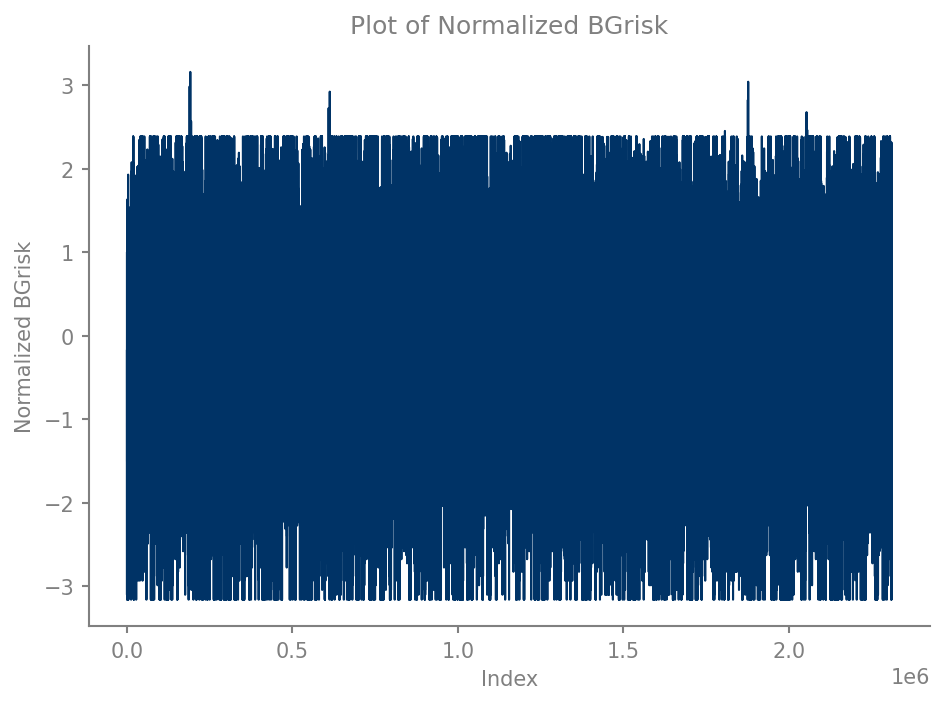

In [11]:
import matplotlib.pyplot as plt

# Set the DPI for the figure
plt.figure(dpi=150)

# Plot the data with a specific color and line width
plt.plot(bg['Normalized BGrisk'], color='#003366', linewidth=1)

# Set the x and y axis labels, their colors, and the title
plt.xlabel('Index', color='gray')
plt.ylabel('Normalized BGrisk', color='gray')
plt.title('Plot of Normalized BGrisk', color='gray')

# Adjust the tick colors and width
ax = plt.gca()  # Get the current axis
ax.tick_params(colors='gray', width=1)

# Remove the top and right axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the color and width for the left and bottom spines
ax.spines['left'].set_color('gray')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(1)

# Optimize the presentation
plt.tight_layout()

# Display the plot
plt.show()
